# Set de Validación y Sets de Testeo

  • Separa un set de entrenamiento en un set de entrenamiento más pequeño y un set de validación.

  • Analizar resultdos de los deltas entre el set de entrenamiento y el set de validación.

  • Testear el modelo entrenado con nuestro set de pruebas y determinar si nuestro modelo esta sobre entrenenado.

  • Detectar y arreglar un problema de entrenamiento comun.

# El Dataset

Utilizaremos el California Houseing Dataset. Consiste en dos datasets separados:

  - El set de entrenamiento: `california_houseing_train.csv`.
  - El set de pruebas/testeo: `california_housing_test.csv`.

Vamos a crear un **set de validación** diviciendo `california_housing_train.csv`:

  - Un set de entrenamiento más pequeño.
  - Un set de validación.


In [12]:
#@title Importamos módulos
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# Cargamos el dataset (desde internet = URL)

In [13]:
# Set de entrenamiento
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
# Set de prueba o testo
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Escalamos los valores de la etiqueta

La siguiente celda código escala `median_house_value`.

In [14]:
scale_factor = 1000.0

# Escalamos la etiqueta del set de entrenamiento.
train_df["median_house_value"] /= scale_factor

# Escalamos ls etiquita del set de pruebas/test
test_df["median_house_value"] /= scale_factor

# Carga de las funciones que construyen y entrenan el modelo

In [15]:
#@title Definición de las funciones para construir y entrenar al modelo
def build_model(my_learning_rate):
  """Crear y complilar una simple regresión lineal."""
  # La mayoría de modelos tf.keras son secuenciales
  model = tf.keras.models.Sequential()

  # Generar una capa lineal al modelo para generar una regresión lineal simple.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compilamos la topografía del modelo en un código que TensorFlow pueda
  # ejecturarlo eficientemente. Configuramos el entrenamiento para minimizar
  # el error cuadrático medio (mean squared error).
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss = "mean_squared_error",
                metrics = [tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, my_epochs,
                my_batch_size = None, my_validation_split = 0.1):
  """Feed a dataset into the model in order to trian it."""

  history = model.fit(x = df[feature],
                      y = df[label],
                      batch_size = my_batch_size,
                      epochs = my_epochs,
                      validation_split = my_validation_split)

  # Recogemos los pesos y los bias entrenados por el modelo.
  trained_weight = model.get_weights()[0]
  trained_bias   = model.get_weights()[1]

  # La lista de epochs es guardado separado del resto del historial.
  epochs = history.epoch

  # Isolamos el error cuadrático medio de cada epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history

print("Funciones build_model y train_model definidos.")

Funciones build_model y train_model definidos.


# Definimos la función de ploteado (de gráficos)

In [16]:
#@title Definimos la función de ploteo
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Ploteamos la curva de pérdida vs. epochs."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label = "Traing Loss")
  plt.plot(epochs[1:], mae_validation[1:], label = "Validation Loss")
  plt.legend()

  # No vamos a plotear el primer epoch debido a que la pérdida del primer epoch
  # es muchas veces substancialmente mayor que la pérdida de los otros epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)

  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()

print("Función de plot_the_loss_curve definida.")

Función de plot_the_loss_curve definida.


---
# TAREA 1: Experimenta con el "validation split"

En la siguienta celda de código, tenemos una variable `validation_split`, que inciaremos en 0.2. La variable `validation_split` especifica la proporción del set de entremientos original que trabajará como el set de validación. El set de entrenamiento original consta de 17.000 ejemplos/muestras. Un `validation_split` de 0.2 significa:

  - 17.000 * 0.2 ~= 3.400 muestras se convertirá en set de validación.
  - 17.000 * 0.8 ~= 13.600 muestras se convertirán en el nuevo set de entrenamiento.

El siguiente código crea un modelo que entrena en base al set de entrenamiento, y evalua el modelo en base a los dos siguientes:

  - El set de entrenamiento (training set).
  - Y el set de validación (validation set).

Si los datos del set de entrenamiento son similares a los datos del set de validación, entonces las dos curvas de pérdida y los valores de pérdida final deberían de ser casi idénticos. Sin embargo, las curvas de pérdida y los valores de pérdida finales **no** son casi identicos. Humm, eso es raro.

Experimenta con dos o tres valores distintos de `validation_split`. ¿Solucionan los distintos valores de `validation_split` el problema?

Epoch 1/30
136/136 [==============================] - 1s 3ms/step - loss: 38612.7148 - root_mean_squared_error: 196.5012 - val_loss: 46802.9688 - val_root_mean_squared_error: 216.3399
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 22053.9160 - root_mean_squared_error: 148.5056 - val_loss: 27164.0586 - val_root_mean_squared_error: 164.8152
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 11677.1904 - root_mean_squared_error: 108.0611 - val_loss: 14697.0000 - val_root_mean_squared_error: 121.2312
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 7105.2192 - root_mean_squared_error: 84.2925 - val_loss: 9517.5332 - val_root_mean_squared_error: 97.5578
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 6515.4619 - root_mean_squared_error: 80.7184 - val_loss: 9242.1367 - val_root_mean_squared_error: 96.1360
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 6511.8047 - ro

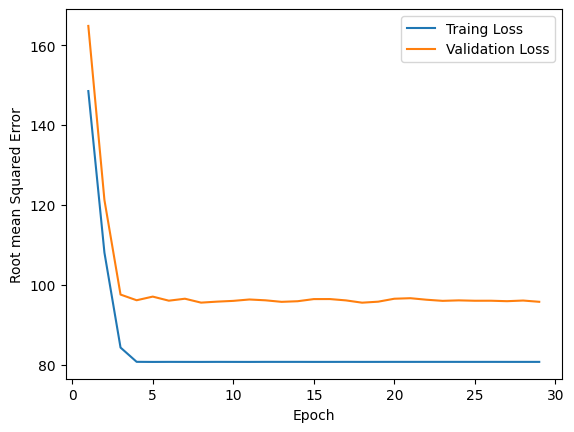

In [17]:
# Las siguientes variables son los hiperparámetros.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Dividir el conjuto (set) de entramiento original en un conjunto de
# entrenamiento reducido y un conjunto de validación.
validation_split = 0.2

# Identificamos la característica y la etiqueta.
my_feature = "median_income"  # El ingreso medio de una manzana específica de la ciudad.
my_label = "median_house_value" # El valor medio de vivienda de una manzana específica de la ciudad.
# Esto significa que vamos a crear un modelo que predice el valor de las casas
# en base al ingreso medio de una vecindad.

# Invocamos las funciones para crear y entrenar el modelo.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])

Epoch 1/30
153/153 [==============================] - 1s 4ms/step - loss: 40806.4297 - root_mean_squared_error: 202.0060 - val_loss: 46990.2461 - val_root_mean_squared_error: 216.7723
Epoch 2/30
153/153 [==============================] - 0s 3ms/step - loss: 21584.4609 - root_mean_squared_error: 146.9165 - val_loss: 27515.7832 - val_root_mean_squared_error: 165.8788
Epoch 3/30
153/153 [==============================] - 0s 3ms/step - loss: 10481.3711 - root_mean_squared_error: 102.3786 - val_loss: 15638.2432 - val_root_mean_squared_error: 125.0530
Epoch 4/30
153/153 [==============================] - 0s 2ms/step - loss: 6689.0620 - root_mean_squared_error: 81.7867 - val_loss: 12087.2910 - val_root_mean_squared_error: 109.9422
Epoch 5/30
153/153 [==============================] - 0s 3ms/step - loss: 6481.2832 - root_mean_squared_error: 80.5064 - val_loss: 11954.5342 - val_root_mean_squared_error: 109.3368
Epoch 6/30
153/153 [==============================] - 0s 3ms/step - loss: 6480.6895 

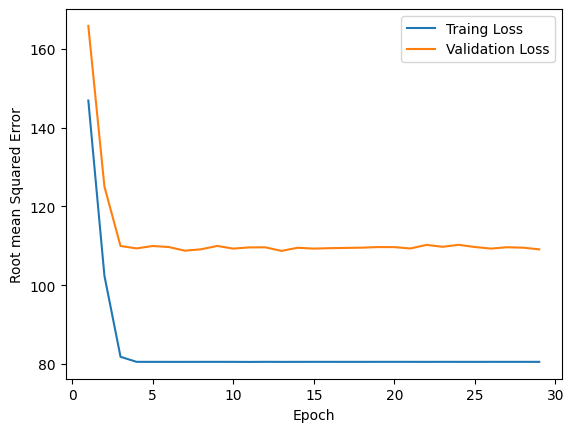

In [18]:
# Las siguientes variables son los hiperparámetros.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Dividir el conjuto (set) de entramiento original en un conjunto de
# entrenamiento reducido y un conjunto de validación.
validation_split = 0.1

# Identificamos la característica y la etiqueta.
my_feature = "median_income"  # El ingreso medio de una manzana específica de la ciudad.
my_label = "median_house_value" # El valor medio de vivienda de una manzana específica de la ciudad.
# Esto significa que vamos a crear un modelo que predice el valor de las casas
# en base al ingreso medio de una vecindad.

# Invocamos las funciones para crear y entrenar el modelo.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])

Epoch 1/30
85/85 [==============================] - 1s 4ms/step - loss: 56894.9883 - root_mean_squared_error: 238.5267 - val_loss: 53149.5625 - val_root_mean_squared_error: 230.5419
Epoch 2/30
85/85 [==============================] - 0s 3ms/step - loss: 56295.0312 - root_mean_squared_error: 237.2657 - val_loss: 52580.0117 - val_root_mean_squared_error: 229.3033
Epoch 3/30
85/85 [==============================] - 0s 3ms/step - loss: 55709.8359 - root_mean_squared_error: 236.0293 - val_loss: 52017.6172 - val_root_mean_squared_error: 228.0737
Epoch 4/30
85/85 [==============================] - 0s 3ms/step - loss: 55117.9922 - root_mean_squared_error: 234.7722 - val_loss: 51451.6914 - val_root_mean_squared_error: 226.8297
Epoch 5/30
85/85 [==============================] - 0s 4ms/step - loss: 54536.4414 - root_mean_squared_error: 233.5304 - val_loss: 50896.0469 - val_root_mean_squared_error: 225.6015
Epoch 6/30
85/85 [==============================] - 0s 3ms/step - loss: 53960.8047 - root_

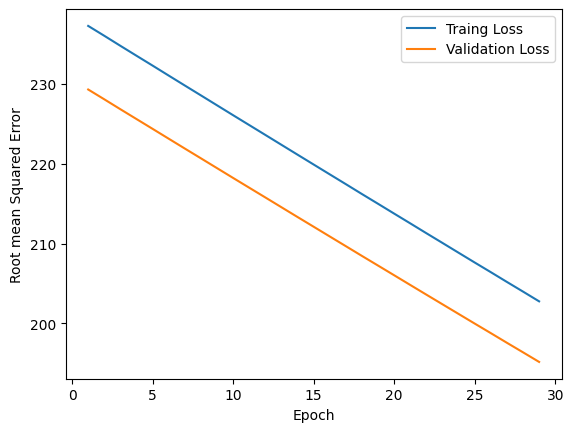

In [19]:
# Las siguientes variables son los hiperparámetros.
learning_rate = 0.003
epochs = 30
batch_size = 100

# Dividir el conjuto (set) de entramiento original en un conjunto de
# entrenamiento reducido y un conjunto de validación.
validation_split = 0.5

# Identificamos la característica y la etiqueta.
my_feature = "median_income"  # El ingreso medio de una manzana específica de la ciudad.
my_label = "median_house_value" # El valor medio de vivienda de una manzana específica de la ciudad.
# Esto significa que vamos a crear un modelo que predice el valor de las casas
# en base al ingreso medio de una vecindad.

# Invocamos las funciones para crear y entrenar el modelo.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])

Epoch 1/30
136/136 [==============================] - 1s 3ms/step - loss: 53045.0859 - root_mean_squared_error: 230.3152 - val_loss: 78860.7266 - val_root_mean_squared_error: 280.8215
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 52141.2148 - root_mean_squared_error: 228.3445 - val_loss: 77659.3047 - val_root_mean_squared_error: 278.6742
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 51255.7383 - root_mean_squared_error: 226.3973 - val_loss: 76472.6094 - val_root_mean_squared_error: 276.5368
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 50374.8672 - root_mean_squared_error: 224.4435 - val_loss: 75292.6094 - val_root_mean_squared_error: 274.3950
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 49501.8164 - root_mean_squared_error: 222.4900 - val_loss: 74124.5234 - val_root_mean_squared_error: 272.2582
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 48636.

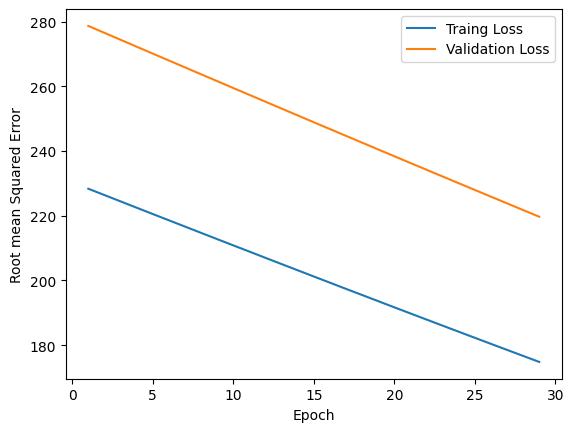

In [20]:
# Las siguientes variables son los hiperparámetros.
learning_rate = 0.003
epochs = 30
batch_size = 100

# Dividir el conjuto (set) de entramiento original en un conjunto de
# entrenamiento reducido y un conjunto de validación.
validation_split = 0.2

# Identificamos la característica y la etiqueta.
my_feature = "median_income"  # El ingreso medio de una manzana específica de la ciudad.
my_label = "median_house_value" # El valor medio de vivienda de una manzana específica de la ciudad.
# Esto significa que vamos a crear un modelo que predice el valor de las casas
# en base al ingreso medio de una vecindad.

# Invocamos las funciones para crear y entrenar el modelo.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])

# TAREA 2: Determina **por qué** las curvas de pérdida difieren

No importa como separes el conjunto de entrenamiento y el conjunto de prueba, las curvas difieren significativamente. Evidentemente los datos en el conjunto de entrenamiento no es lo suficientemente similar al del set de prueba. ¿Contraintuitivo? Pues sí, pero este problema es muy común en aprendizaje automático.

Tú tarea es determinar **por qué** las curvas de perdida no son altamente similares. Como la mayoría de los problemas en el aprenzaje automático, el problema radica en los datos mismos. Para resolver el misterio de por qué el conjunto de entrenamiento y el conjunto de validación no son identicos, escribe una o dos lineas de código en pandas en la siguiente celda de código. Aquí hay un par de pistas:

- La anterior celda de código divide el conjunto de datos de entrenamiento en:

  - En un conjunto de datos de entrenamiento más reducido (el set de entranamiento original - el set de validación).
  - El conjunto de datos para la validación.


- Por defecto, el método `head` de pandas saca las 5 primeras filas de DataFrame. Para ver más sobre el conjunto de entrenamiento, específica los `n` argumentos `head`.



In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [30]:
train_df.shape

(17000, 9)

In [31]:
train_df.head(1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


In [32]:
#@title Respuesta:

# Después de analizar los datos parece que el conjunto de entrenamiento
# está ordenado en base a la característica "longitude".
# Aparentemente, "longitude" influencia la relación entre "total_rooms"
# y "median_house_value".

# TAREA 3: Soluciona el problema

Para solucionar el problema, mezcla ("desordena") las muestras del conjunto de datos de entrenamiento antes de seperar las muestras en el nuevo conjunto de entrenamiento y en el conjunto de testeo/prueba. Para eso, sigue los siguientes pasos:

1. Mezcla los datos de entrenamiento añadiendo la siguiente linea de código antes de `train_model`

```     
  shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))
```

2. Pasa `shuffled_train_df` (en vez de train_df) como segundo argumento a `train_model` (en código asociado a la TAREA 1) haciendo que el código resulte de la siguiente manera:

```
  epochs, rmse, history = train_model(my_model, shuffled_train_model, my_feature,vmy_label, epochs, batch_size, validation_split)
```

Epoch 1/70
136/136 [==============================] - 1s 4ms/step - loss: 43866.1172 - root_mean_squared_error: 209.4424 - val_loss: 34189.7461 - val_root_mean_squared_error: 184.9047
Epoch 2/70
136/136 [==============================] - 0s 2ms/step - loss: 25685.6191 - root_mean_squared_error: 160.2673 - val_loss: 19128.1172 - val_root_mean_squared_error: 138.3044
Epoch 3/70
136/136 [==============================] - 0s 2ms/step - loss: 13789.5176 - root_mean_squared_error: 117.4288 - val_loss: 10281.8379 - val_root_mean_squared_error: 101.3994
Epoch 4/70
136/136 [==============================] - 0s 2ms/step - loss: 8029.8853 - root_mean_squared_error: 89.6096 - val_loss: 7387.7568 - val_root_mean_squared_error: 85.9521
Epoch 5/70
136/136 [==============================] - 0s 2ms/step - loss: 6947.5596 - root_mean_squared_error: 83.3520 - val_loss: 7306.3818 - val_root_mean_squared_error: 85.4774
Epoch 6/70
136/136 [==============================] - 0s 2ms/step - loss: 6941.5854 - ro

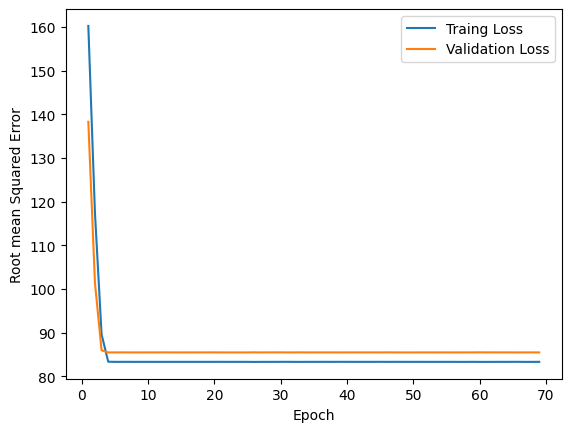

In [47]:
# Las siguientes variables son los hiperparámetros.
learning_rate = 0.08
epochs = 70
batch_size = 100

# Dividir el conjuto (set) de entramiento original en un conjunto de
# entrenamiento reducido y un conjunto de validación.
validation_split = 0.2

# Identificamos la característica y la etiqueta.
my_feature = "median_income"  # El ingreso medio de una manzana específica de la ciudad.
my_label = "median_house_value" # El valor medio de vivienda de una manzana específica de la ciudad.
# Esto significa que vamos a crear un modelo que predice el valor de las casas
# en base al ingreso medio de una vecindad.

# Mezclamos las muestras.
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

# Invocamos las funciones para crear y entrenar el modelo.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])

In [38]:
#@title conclusiones:

# Sí, después de barajar el conjunto de entrenamiento original,
# la pérdida final del conjunto de entrenamiento y el conjunto
# de validación se acercan mucho más.

# Si validation_split < 0.15, los valores de pérdida final para
# el conjunto de entrenamiento y el conjunto de validación divergen
# significativamente. Aparentemente, el conjunto de validación
# ya no contiene suficientes ejemplos.

# TAREA 4: Usa el conjunto de datos de test para evaluar el desempeño de tu modelo.

El conjunto de datos de prueba actúa como el juéz final de la calidad del modelo.

```
   x_test = test_df[my_feature]
   y_test = test_df[my_label]

   result = my_model.evalueate(x_test, y_test, batch_size = batch_size)
```


Compare el error cuadrático medio del modelo cuando se evalúa en cada uno de los tres conjuntos de datos:

  • Conjunto de entrenamiento: mira `root_mean_squared_error` en el entrenamiento final.
  • Conjunto de validación: mira `val_root_mean_squared_error` en el último epoch de entrenamient.
  • Conjunto de pruebas: ejecuta el código presentado en la celda anterior y examina `root_mean_squared_error`.

Idealmente, el error cuadrático medio de los 3 conjuntos debería ser similar. ¿Lo son?

In [46]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size = batch_size)

30/30 [==============================] - 0s 2ms/step - loss: 7013.8042 - root_mean_squared_error: 83.7485
